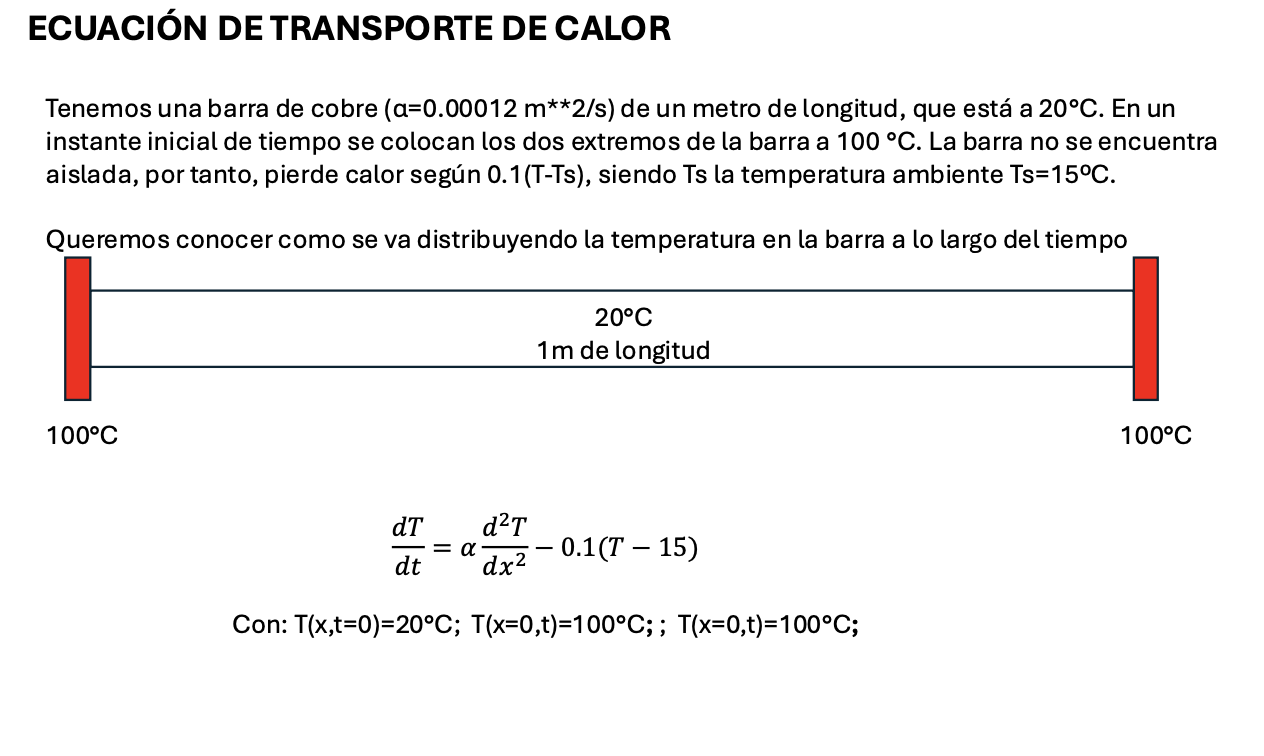

## Explicación Problema

## Código

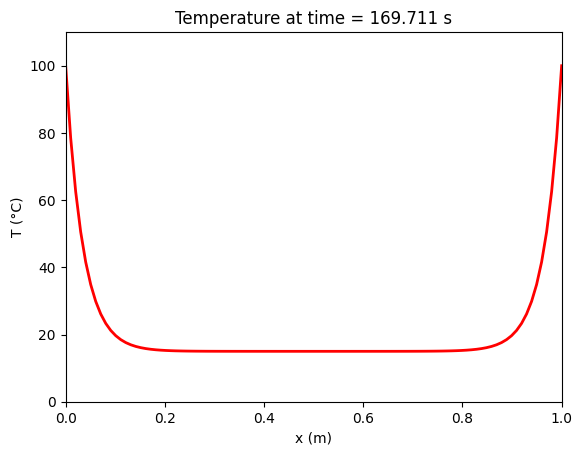

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Parámetros
L = 1.0                  # Longitud (m)
alpha = 0.00012          # Difusividad térmica (m^2/s)
Nx = 100                 # Número de puntos espaciales
dx = L / (Nx - 1)        # Paso espacial
dt = 0.4 * dx**2 / alpha # Paso temporal (condición de estabilidad)
Nt = 500                 # Pasos de tiempo

# Término de pérdida hacia el ambiente
k = 0.1
Ts = 15  # Temperatura ambiente

# Condición de estabilidad
lambda_ = alpha * dt / dx**2
assert lambda_ <= 0.5, "Condición de estabilidad no satisfecha"

# Malla espacial e inicialización
x = np.linspace(0, L, Nx)
T = np.ones(Nx) * 20     # T(x,0) = 20°C
T[0] = 100
T[-1] = 100

# Configurar gráfica
fig, ax = plt.subplots()
line, = ax.plot(x, T, 'r-', linewidth=2)
ax.set_xlim(0, L)
ax.set_ylim(0, 110)
ax.set_xlabel("x (m)")
ax.set_ylabel("T (°C)")
title = ax.set_title("Temperature at time = 0.000 s")

# Función de actualización
def update(frame):
    global T
    T_new = T.copy()
    for i in range(1, Nx - 1):
        diffusion = lambda_ * (T[i+1] - 2*T[i] + T[i-1])
        loss = -k * (T[i] - Ts) * dt
        T_new[i] = T[i] + diffusion + loss

    # Condiciones de frontera fijas
    T_new[0] = 100
    T_new[-1] = 100

    T[:] = T_new
    line.set_ydata(T)
    title.set_text(f"Temperature at time = {frame * dt:.3f} s")
    return line, title

# Animación
ani = animation.FuncAnimation(fig, update, frames=Nt, interval=50, blit=True)

# Guardar como gif
ani.save("heat_loss_to_air.gif", writer=animation.PillowWriter(fps=20))

plt.show()